In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [12]:
#load dataset

df = pd.read_csv('/Users/daniyalrosli/fyp/cleaned_heart_disease_data.csv')

In [13]:
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')



In [14]:
#DATA PREPROCESSING

#info about dataset

df.info()
df.describe()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,149.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0
302,57.0,0.0,1.0,130.0,236.0,0.0,0.0,174.0,0.0,0.0,1.0,1.0,2.0,0.0


In [15]:
#summary statistics

# Basic statistics
mean_values = df.mean()
median_values = df.median()
std_values = df.std()

# Value distributions
value_distributions = df.describe()

print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nStandard Deviation:\n", std_values)
print("\nValue Distributions:\n", value_distributions)

Mean Values:
 age          54.346535
sex           0.683168
cp            0.966997
trestbps    131.557756
chol        245.864554
fbs           0.148515
restecg       0.528053
thalach     149.715908
exang         0.326733
oldpeak       1.027723
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

Median Values:
 age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

Standard Deviation:
 age          8.919547
sex          0.466011
cp           1.032052
trestbps    17.110736
chol        48.874343
fbs          0.356198
restecg      0.525860
thalach     22.467881
exang        0.469794
oldpeak      1.119258
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
dtype: float64

Value Distributions

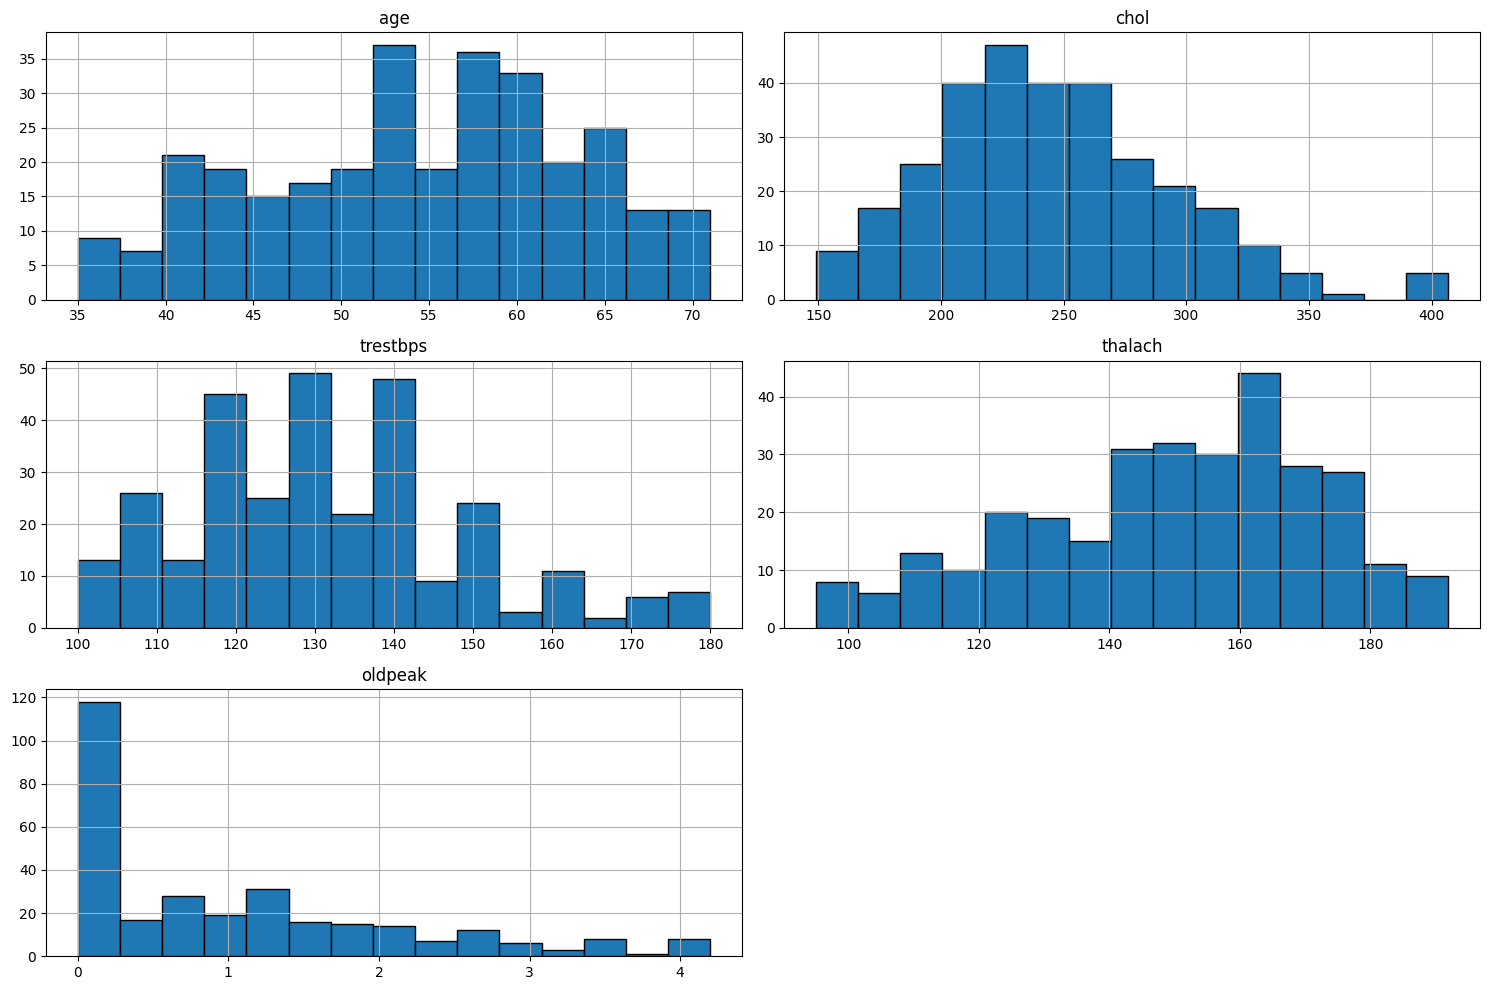

In [16]:
# List of numerical features to plot
numerical_features = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']

# Plot histograms
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 2), edgecolor='black')
plt.tight_layout()
plt.show()

In [17]:
# missing values

missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing values
df = df.dropna()

# Check for missing values
missing_values = df.isnull().sum()

print("Missing Values:\n", missing_values)



Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


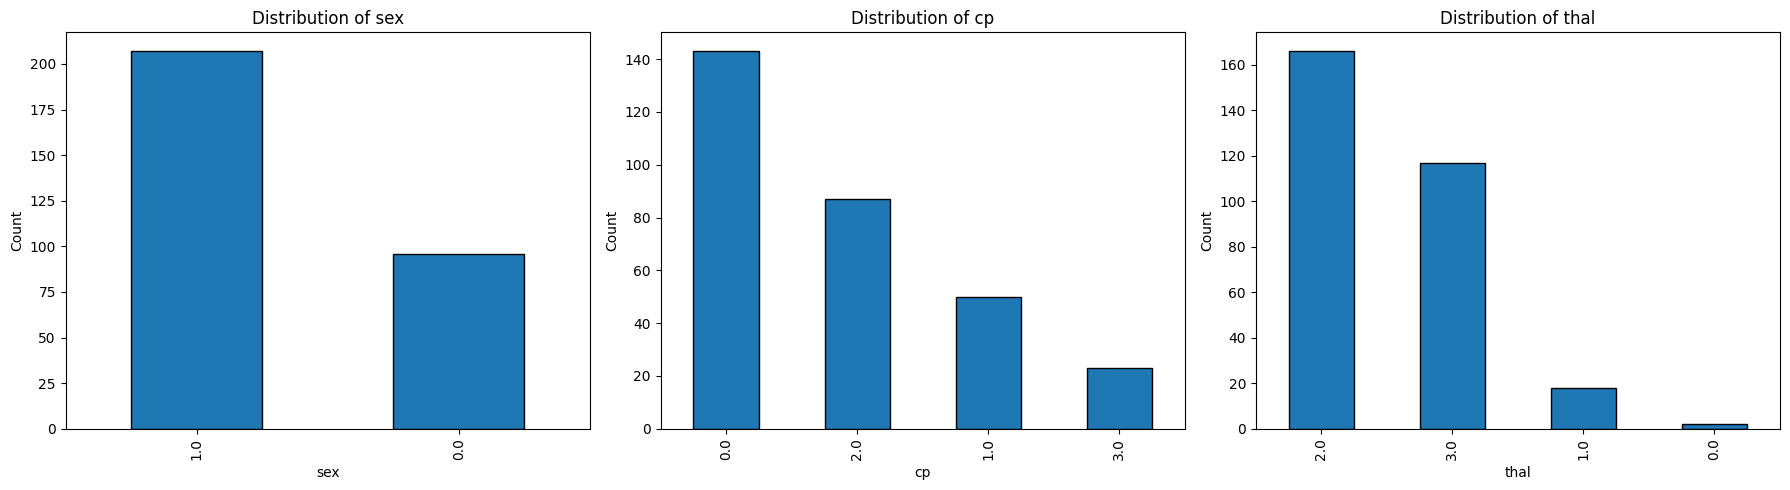

In [18]:
# List of categorical features to plot
categorical_features = ['sex', 'cp', 'thal']

# Plot bar plots for categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind='bar', ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Note: you may need to restart the kernel to use updated packages.


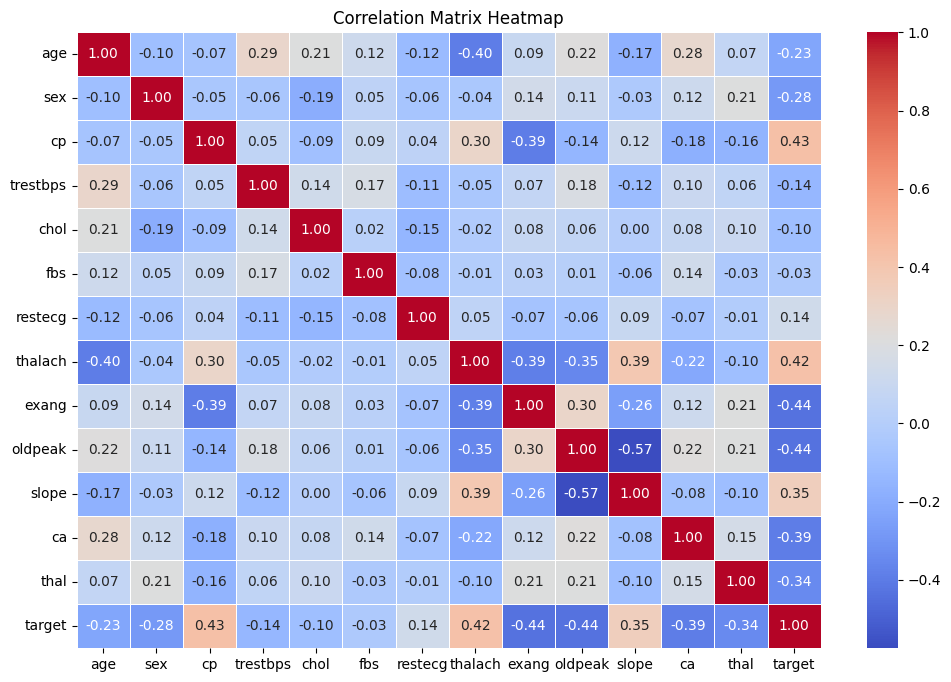

In [19]:
%pip install seaborn

import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [20]:
# Define a function to filter outliers using IQR
def filter_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# List of numerical features to filter outliers
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Filter outliers
df_filtered = filter_outliers(df, numerical_features)

# Display the filtered dataframe
print(df_filtered.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  285.000000  285.000000  285.000000  285.000000  285.000000  285.000000   
mean    54.017544    0.701754    0.985965  129.919298  242.231579    0.140351   
std      9.006045    0.458293    1.031107   15.261470   44.278358    0.347962   
min     35.000000    0.000000    0.000000  100.000000  149.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  210.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  239.000000    0.000000   
75%     60.000000    1.000000    2.000000  140.000000  270.000000    0.000000   
max     71.000000    1.000000    3.000000  170.000000  360.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  285.000000  285.000000  285.000000  285.000000  285.000000  285.000000   
mean     0.526316  149.848982    0.315789    0.948772    1.428070    0.705263   
std      0.514072   22.6911

In [21]:
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute numerical columns with mean
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute categorical columns with mode
if len(categorical_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Verify if there are any missing values left
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


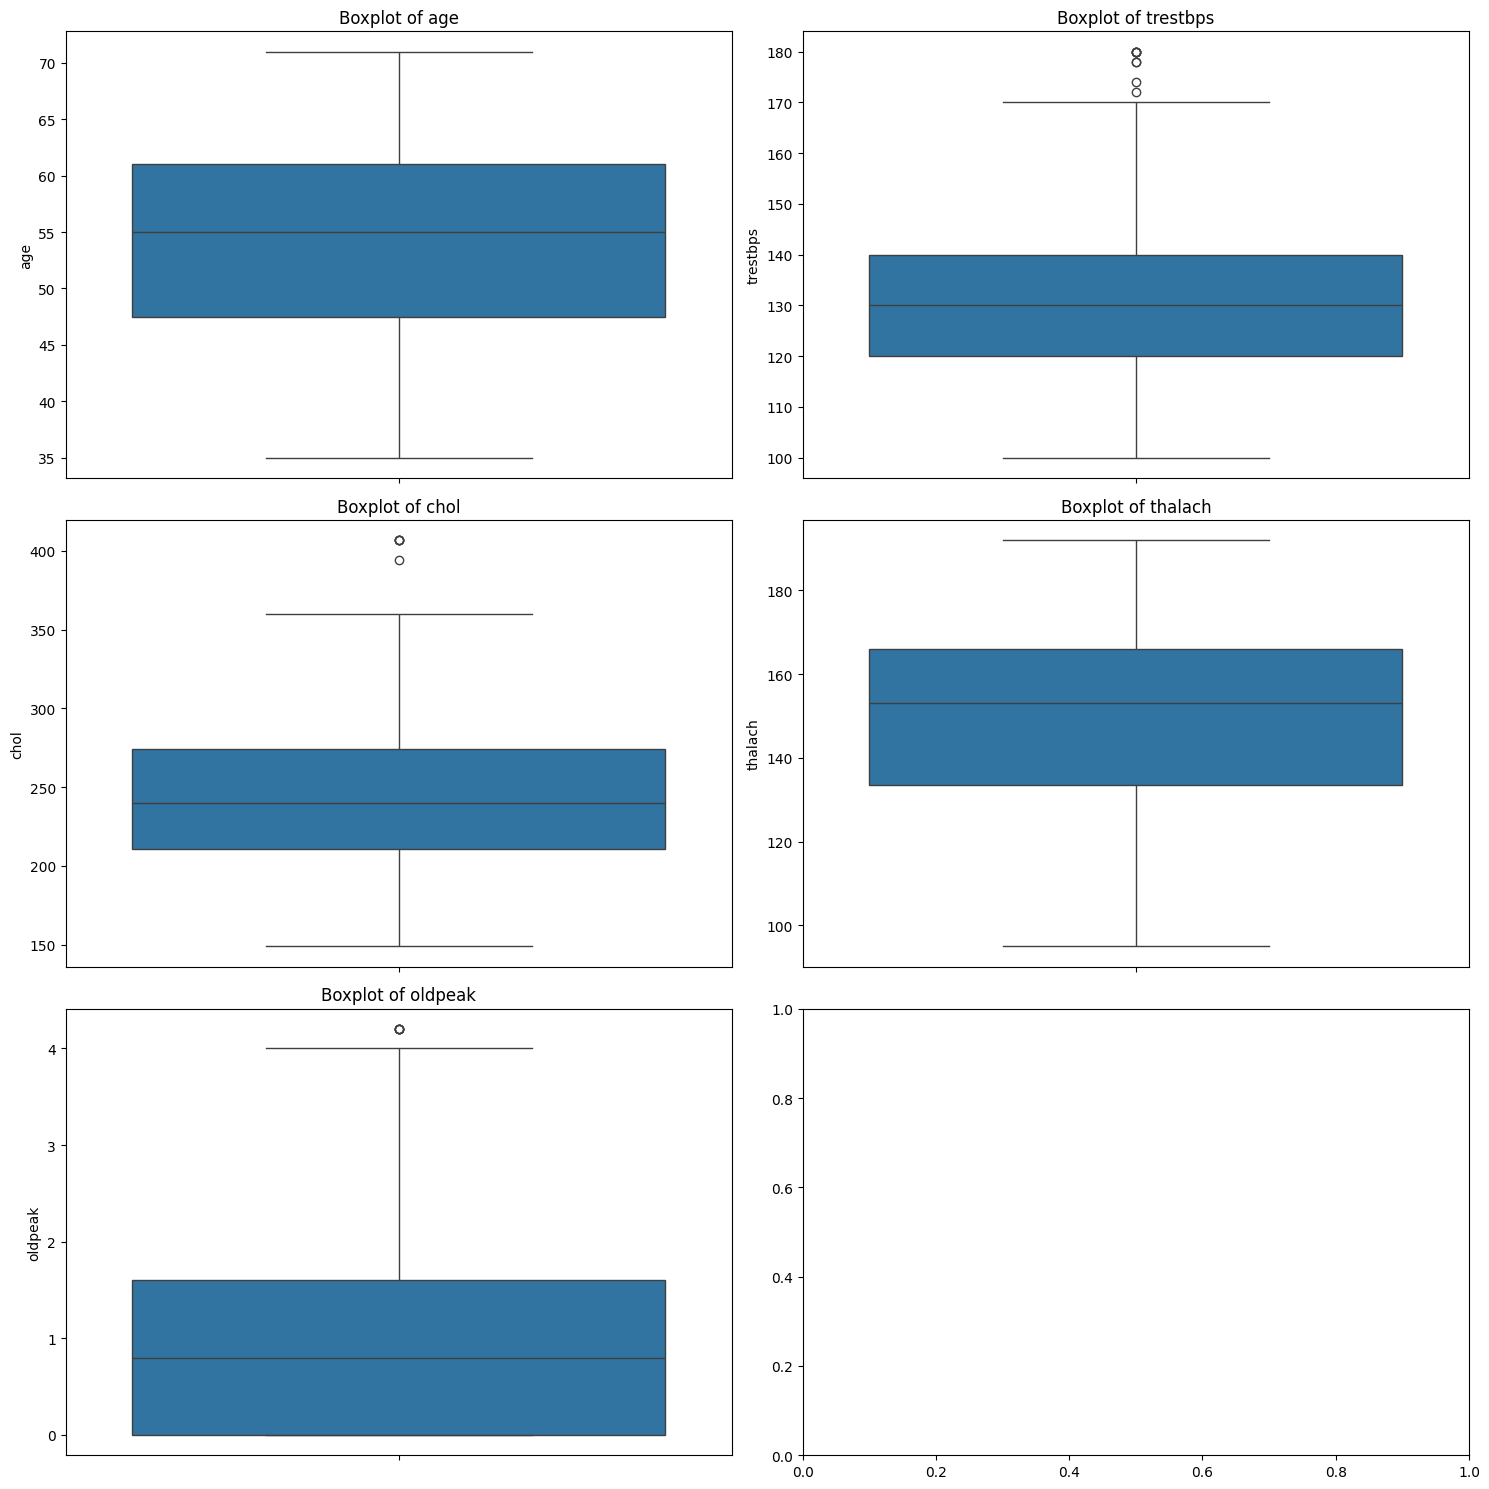

              age    trestbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.346535  131.557756  245.861191  149.715649    1.027723
std      8.919547   17.110736   48.863242   22.466273    1.119258
min     35.000000  100.000000  149.000000   95.039600    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     71.000000  180.000000  406.485200  191.920800    4.200000


In [22]:
# Plot boxplots for numerical features to identify outliers
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

# Handle outliers by capping them at the 1st and 99th percentiles
for feature in numerical_features:
    lower_bound = df[feature].quantile(0.01)
    upper_bound = df[feature].quantile(0.99)
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])

# Verify the changes
print(df[numerical_features].describe())

In [23]:
# Save the cleaned dataset to a new CSV file
df.to_csv('/Users/daniyalrosli/fyp/cleaned_heart_disease_data.csv', index=False)

In [24]:
#logistic reggression model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')



Accuracy: 0.87
Precision: 0.88
Recall: 0.88
F1-score: 0.88


In [25]:
from sklearn.tree import DecisionTreeClassifier

#decision tree

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f'Accuracy (DT): {accuracy_dt:.2f}')
print(f'Precision (DT): {precision_dt:.2f}')
print(f'Recall (DT): {recall_dt:.2f}')
print(f'F1-score (DT): {f1_dt:.2f}')

Accuracy (DT): 0.75
Precision (DT): 0.84
Recall (DT): 0.66
F1-score (DT): 0.74


In [26]:
from sklearn.ensemble import RandomForestClassifier

# random forest

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f'Accuracy (RF): {accuracy_rf:.2f}')
print(f'Precision (RF): {precision_rf:.2f}')
print(f'Recall (RF): {recall_rf:.2f}')
print(f'F1-score (RF): {f1_rf:.2f}')

Accuracy (RF): 0.84
Precision (RF): 0.84
Recall (RF): 0.84
F1-score (RF): 0.84


In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize and fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Example of a single new data point (preprocessed, and the same number of features as the training data)
new_data_point = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])  # Example values

# Apply the same scaling as before
new_data_point_scaled = scaler.transform(new_data_point)

# Make the prediction for the new data point
new_prediction = lr_model.predict(new_data_point_scaled)
print("Prediction for the new data point:", new_prediction)

Prediction for the new data point: [1.]


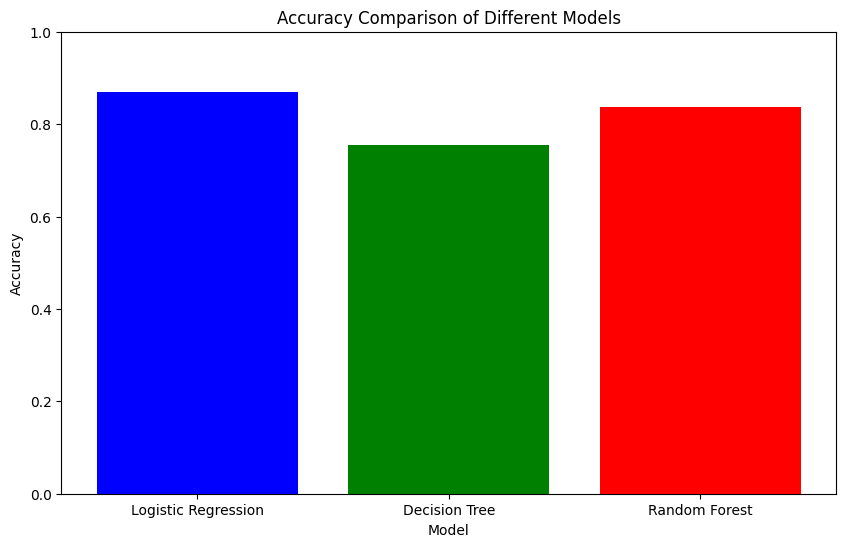

In [28]:
# Accuracy scores
accuracy_scores = {
    'Logistic Regression': accuracy,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf
}

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.show()

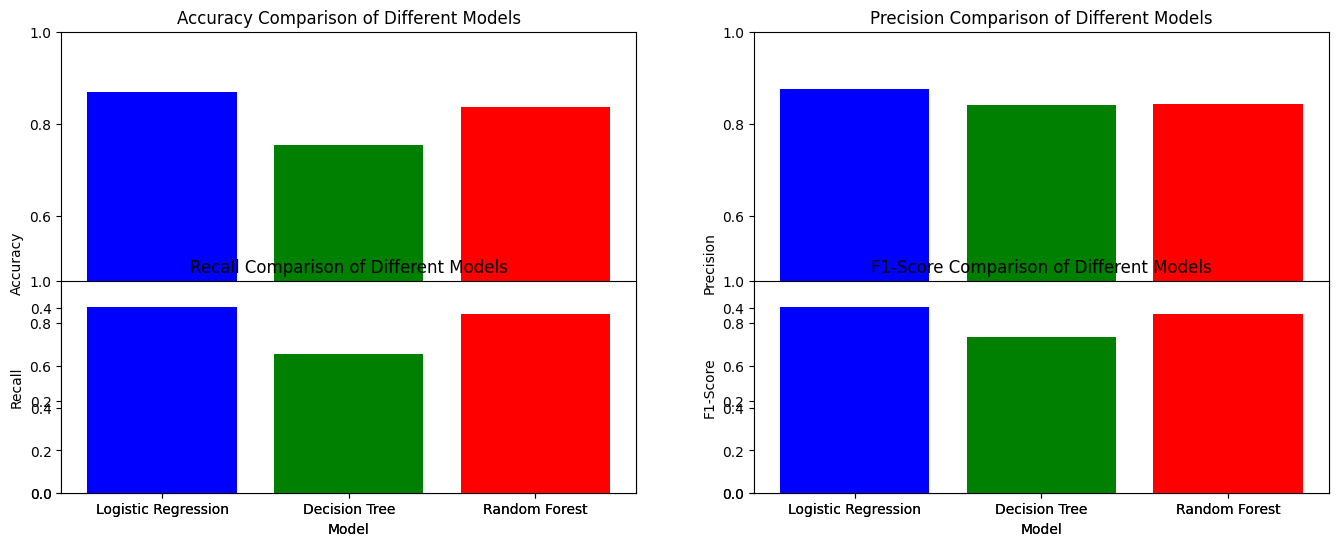

In [29]:
# Accuracy scores
accuracy_scores = {
    'Logistic Regression': accuracy,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf
}

# Precision scores
precision_scores = {
    'Logistic Regression': precision,
    'Decision Tree': precision_dt,
    'Random Forest': precision_rf
}

# Plot the accuracy scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)

# Plot the precision scores
plt.subplot(1, 2, 2)
plt.bar(precision_scores.keys(), precision_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision Comparison of Different Models')
plt.ylim(0, 1)

# Recall scores
recall_scores = {
    'Logistic Regression': recall,
    'Decision Tree': recall_dt,
    'Random Forest': recall_rf
}

# F1 scores
f1_scores = {
    'Logistic Regression': f1,
    'Decision Tree': f1_dt,
    'Random Forest': f1_rf
}

# Plot the recall scores
plt.subplot(2, 2, 3)
plt.bar(recall_scores.keys(), recall_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Comparison of Different Models')
plt.ylim(0, 1)

# Plot the F1 scores
plt.subplot(2, 2, 4)
plt.bar(f1_scores.keys(), f1_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison of Different Models')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

                 Model  Accuracy  Precision   Recall  F1-Score
0  Logistic Regression  0.868852    0.87500  0.87500  0.875000
1        Decision Tree  0.754098    0.84000  0.65625  0.736842
2        Random Forest  0.836066    0.84375  0.84375  0.843750

Best Model for Heart Disease Prediction:


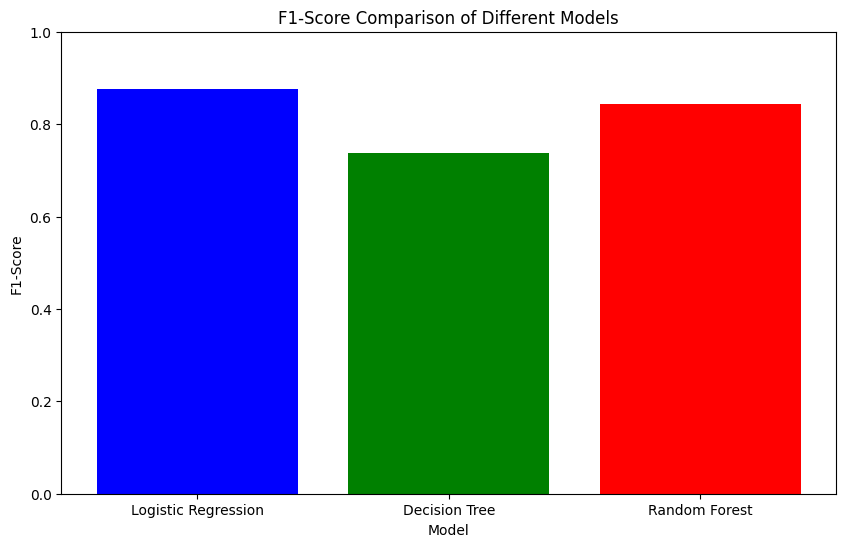

In [30]:
# Create a DataFrame to compare the models
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy, accuracy_dt, accuracy_rf],
    'Precision': [precision, precision_dt, precision_rf],
    'Recall': [recall, recall_dt, recall_rf],
    'F1-Score': [f1, f1_dt, f1_rf]
})

# Display the comparison DataFrame
print(comparison_df)

# Identify the best model based on F1-Score
best_model = comparison_df.loc[comparison_df['F1-Score'].idxmax()]
print("\nBest Model for Heart Disease Prediction:")
# Visualize the best model based on F1-Score
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['F1-Score'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison of Different Models')
plt.ylim(0, 1)
plt.show()

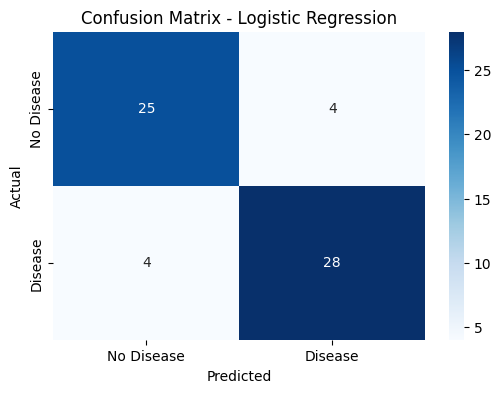

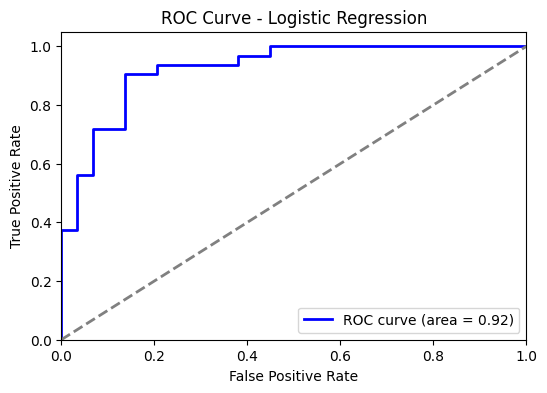

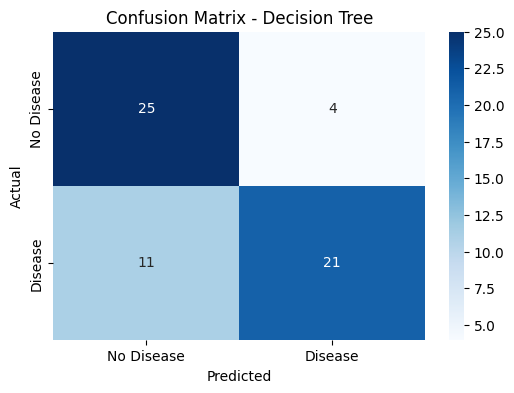

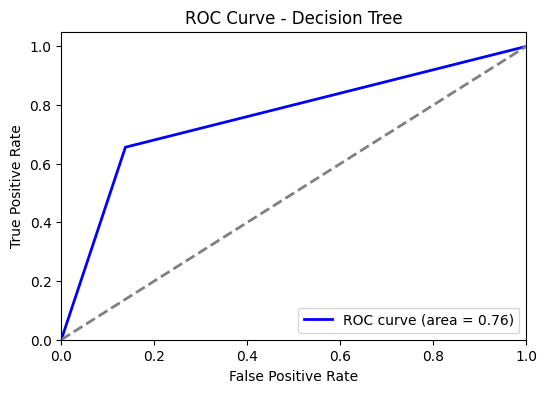

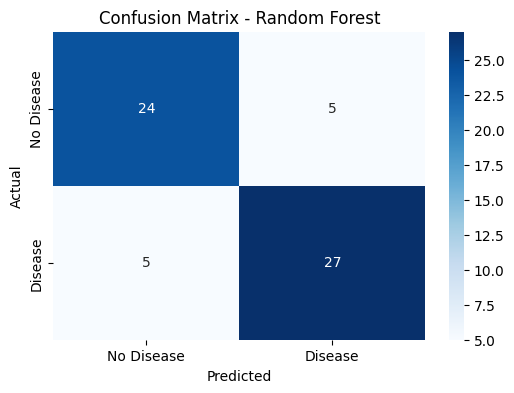

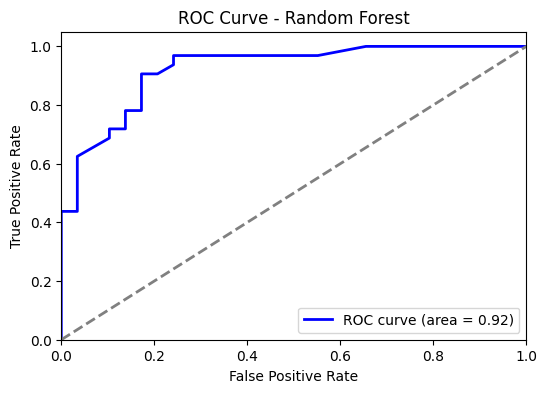

In [31]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Logistic Regression
plot_confusion_matrix(y_test, y_pred, 'Confusion Matrix - Logistic Regression')
plot_roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1], 'ROC Curve - Logistic Regression')

# Decision Tree
plot_confusion_matrix(y_test, y_pred_dt, 'Confusion Matrix - Decision Tree')
plot_roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1], 'ROC Curve - Decision Tree')

# Random Forest
plot_confusion_matrix(y_test, y_pred_rf, 'Confusion Matrix - Random Forest')
plot_roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], 'ROC Curve - Random Forest')

In [32]:
# Make predictions using the logistic regression model
y_pred_lr = lr_model.predict(X_test)

# Display the predictions
print("Predictions using Logistic Regression:", y_pred_lr)

Predictions using Logistic Regression: [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]


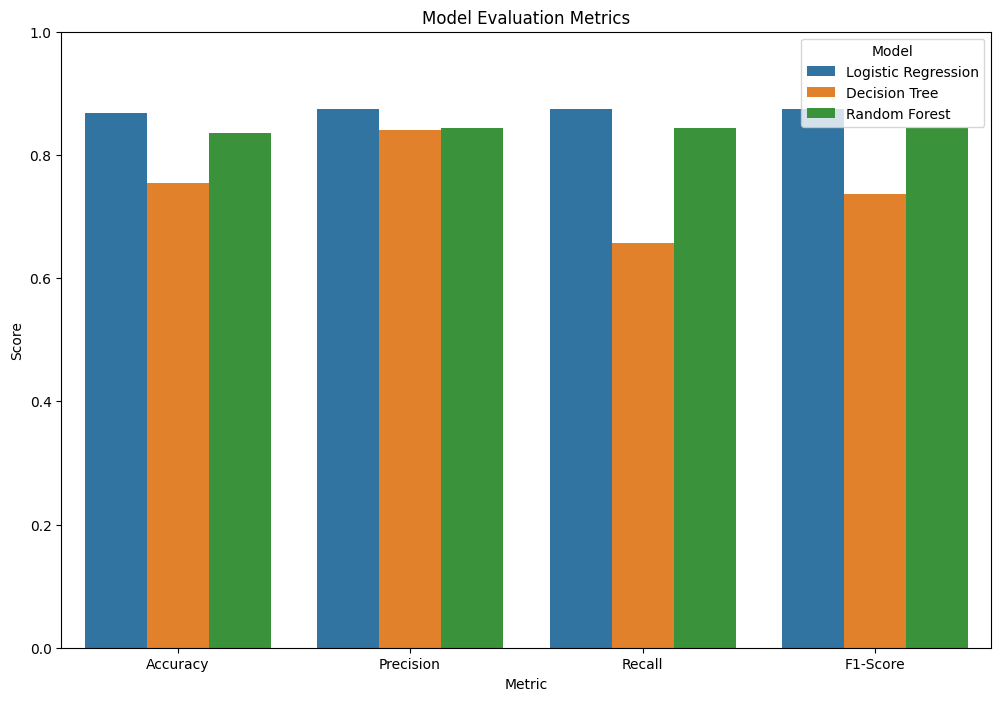

In [33]:
import seaborn as sns

# Create a DataFrame to compare the models
evaluation_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy, accuracy_dt, accuracy_rf],
    'Precision': [precision, precision_dt, precision_rf],
    'Recall': [recall, recall_dt, recall_rf],
    'F1-Score': [f1, f1_dt, f1_rf]
})

# Melt the DataFrame for easier plotting with Seaborn
evaluation_melted = evaluation_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot the evaluation metrics
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=evaluation_melted)
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df =pd.read_csv('/Users/daniyalrosli/fyp/cleaned_heart_disease_data.csv')


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Ensure X_train is defined
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize GridSearchCV for each model
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='f1')
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1')
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1')

# Fit GridSearchCV for each model
grid_search_lr.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score for each model
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best parameters for Logistic Regression:", best_params_lr)
print("Best F1 score for Logistic Regression:", best_score_lr)

print("Best parameters for Decision Tree:", best_params_dt)
print("Best F1 score for Decision Tree:", best_score_dt)

print("Best parameters for Random Forest:", best_params_rf)
print("Best F1 score for Random Forest:", best_score_rf)


KeyboardInterrupt: 

In [10]:
# Make predictions using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Display the predictions
print("Predictions using Random Forest:", y_pred_rf)

Predictions using Random Forest: [0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]


In [11]:
# Make predictions using the Decision Tree model
y_pred_dt = dt_model.predict(X_test)

# Display the predictions
print("Predictions using Decision Tree:", y_pred_dt)

Predictions using Decision Tree: [0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]


In [9]:
import joblib
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Ensure df is defined
df = pd.read_csv('/Users/daniyalrosli/fyp/cleaned_heart_disease_data.csv')

# Ensure lr_model, dt_model, and rf_model are defined
# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
lr_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train the models
lr_model.fit(X_train, y_train)

from sklearn.model_selection import train_test_split

# Save the models to disk
model_dir = '/Users/daniyalrosli/fyp/models'
os.makedirs(model_dir, exist_ok=True)

joblib.dump(lr_model, os.path.join(model_dir, 'logistic_regression_model.pkl'))
joblib.dump(dt_model, os.path.join(model_dir, 'decision_tree_model.pkl'))
joblib.dump(rf_model, os.path.join(model_dir, 'random_forest_model.pkl'))

print("Models saved successfully.")

Models saved successfully.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


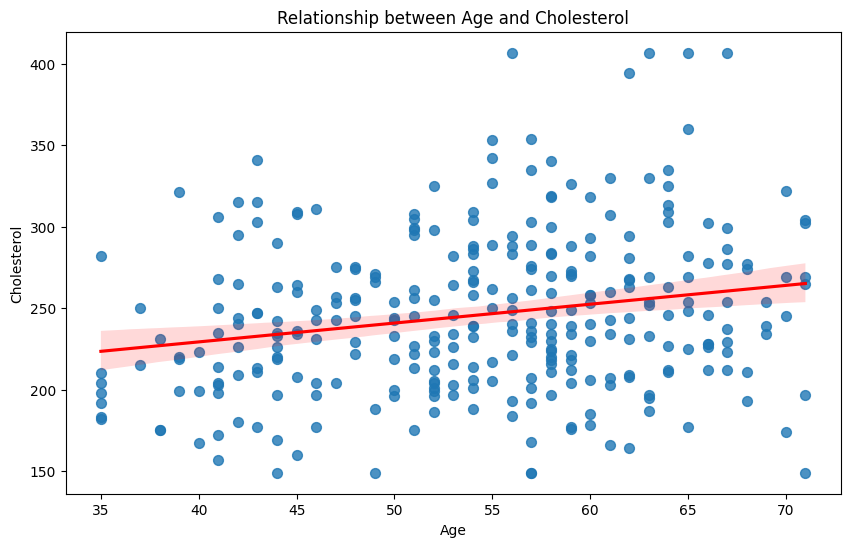

In [14]:
import seaborn as sns

import matplotlib.pyplot as plt

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='chol', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Relationship between Age and Cholesterol')
plt.show()

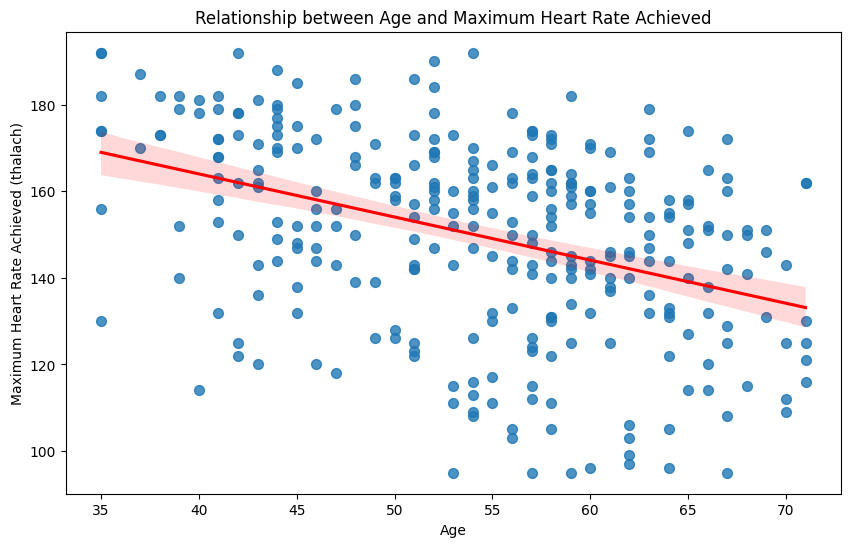

In [15]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='thalach', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')
plt.title('Relationship between Age and Maximum Heart Rate Achieved')
plt.show()

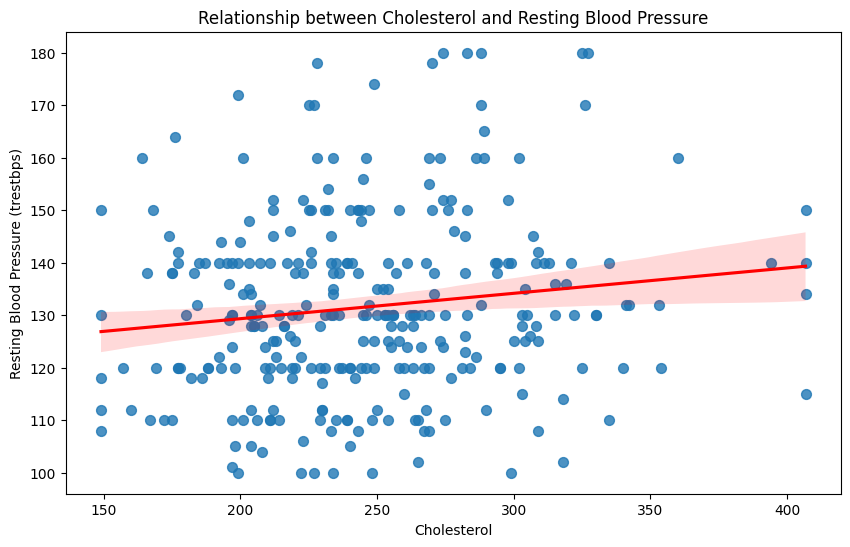

In [16]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='chol', y='trestbps', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('Cholesterol')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.title('Relationship between Cholesterol and Resting Blood Pressure')
plt.show()

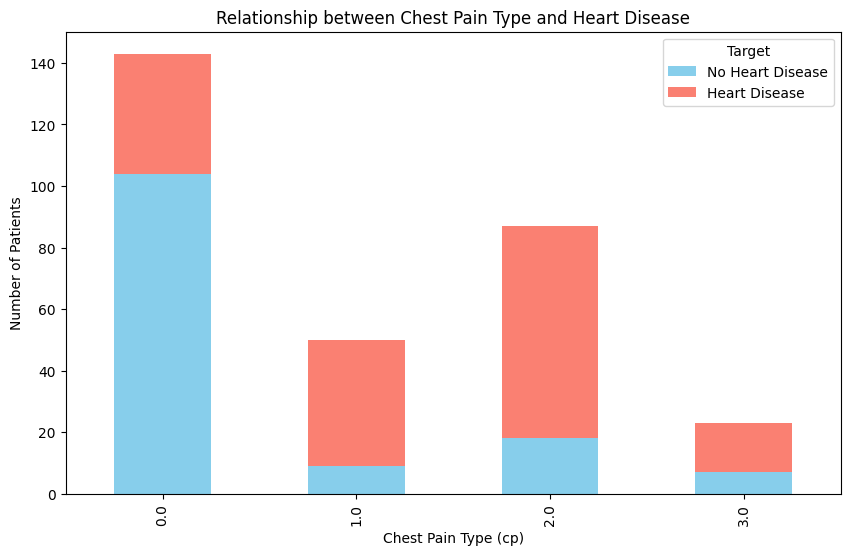

In [19]:
# Count the occurrences of each chest pain type for patients with and without heart disease
cp_vs_target = df.groupby(['cp', 'target']).size().unstack()

# Plot the bar plot
cp_vs_target.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Number of Patients')
plt.title('Relationship between Chest Pain Type and Heart Disease')
plt.legend(['No Heart Disease', 'Heart Disease'], title='Target')
plt.show()

In [ ]:
#predictive system
# Import required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  # Assuming you're using Logistic Regression
import numpy as np

def get_user_input():
    age = int(input("Enter age: "))
    sex = int(input("Enter sex (1 = male; 0 = female): "))
    cp = int(input("Enter chest pain type (0-3): "))
    trestbps = int(input("Enter resting blood pressure: "))
    chol = int(input("Enter serum cholesterol in mg/dl: "))
    fbs = int(input("Enter fasting blood sugar > 120 mg/dl (1 = true; 0 = false): "))
    restecg = int(input("Enter resting electrocardiographic results (0-2): "))
    thalach = int(input("Enter maximum heart rate achieved: "))
    exang = int(input("Enter exercise induced angina (1 = yes; 0 = no): "))
    oldpeak = float(input("Enter ST depression induced by exercise relative to rest: "))
    slope = int(input("Enter the slope of the peak exercise ST segment (0-2): "))
    ca = int(input("Enter number of major vessels (0-3) colored by fluoroscopy: "))
    thal = int(input("Enter thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect): "))
    
    user_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
    return user_data

# Get user input
user_input = get_user_input()

# Ensure that scaler and lr_model are already defined and trained
# Scale the user input
try:
    user_input_scaled = scaler.transform(user_input)  # Scale the input data
except NameError:
    print("Scaler is not defined. Please ensure the scaler is fitted with training data.")

# Make prediction
try:
    user_prediction = lr_model.predict(user_input_scaled)  # Predict using the trained model
    print("Prediction for the user input:", "Heart Disease" if user_prediction[0] == 1 else "No Heart Disease")
except NameError:
    print("Model is not defined. Please ensure the logistic regression model is trained.")

ValueError: invalid literal for int() with base 10: ''

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/daniyalrosli/fyp/cleaned_heart_disease_data.csv')




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




# Test all the models

# Logistic Regression
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f'Logistic Regression - Accuracy: {accuracy_lr:.2f}, Precision: {precision_lr:.2f}, Recall: {recall_lr:.2f}, F1-Score: {f1_lr:.2f}')

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f'Decision Tree - Accuracy: {accuracy_dt:.2f}, Precision: {precision_dt:.2f}, Recall: {recall_dt:.2f}, F1-Score: {f1_dt:.2f}')

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f'Random Forest - Accuracy: {accuracy_rf:.2f}, Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}, F1-Score: {f1_rf:.2f}')


NameError: name 'lr_model' is not defined

In [8]:
from sklearn.model_selection import GridSearchCV

#hyperparameter tuning and error analysis

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize GridSearchCV for each model
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='f1')
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1')
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1')

# Fit GridSearchCV for each model
grid_search_lr.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score for each model
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best parameters for Logistic Regression:", best_params_lr)
print("Best F1 score for Logistic Regression:", best_score_lr)

print("Best parameters for Decision Tree:", best_params_dt)
print("Best F1 score for Decision Tree:", best_score_dt)

print("Best parameters for Random Forest:", best_params_rf)
print("Best F1 score for Random Forest:", best_score_rf)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best F1 score for Logistic Regression: 0.8413254682401687
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best F1 score for Decision Tree: 0.7880431768667063
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 score for Random Forest: 0.8443630189247783


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ensure scaler is defined and fit on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with increased max_iter
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Decision Tree model (tune hyperparameters as needed)
dt_model = DecisionTreeClassifier(max_depth=None, min_samples_split=20, min_samples_leaf=1, random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

# Random Forest model (tune hyperparameters as needed)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print results for all models
print(f'Updated Logistic Regression - Accuracy: {accuracy_lr:.2f}, Precision: {precision_lr:.2f}, Recall: {recall_lr:.2f}, F1-Score: {f1_lr:.2f}')
print(f'Updated Decision Tree - Accuracy: {accuracy_dt:.2f}, Precision: {precision_dt:.2f}, Recall: {recall_dt:.2f}, F1-Score: {f1_dt:.2f}')
print(f'Updated Random Forest - Accuracy: {accuracy_rf:.2f}, Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}, F1-Score: {f1_rf:.2f}')

Updated Logistic Regression - Accuracy: 0.85, Precision: 0.87, Recall: 0.84, F1-Score: 0.86
Updated Decision Tree - Accuracy: 0.82, Precision: 0.89, Recall: 0.75, F1-Score: 0.81
Updated Random Forest - Accuracy: 0.87, Precision: 0.85, Recall: 0.91, F1-Score: 0.88


In [14]:
# Function to display misclassified instances
def display_misclassified(y_true, y_pred, X_test, model_name):
    misclassified_indices = np.where(y_true != y_pred)[0]
    misclassified_samples = X_test.iloc[misclassified_indices]
    misclassified_true_labels = y_true.iloc[misclassified_indices]
    misclassified_pred_labels = y_pred[misclassified_indices]
    
    print(f"\nMisclassified instances for {model_name}:")
    for i in range(len(misclassified_indices)):
        print(f"Index: {misclassified_indices[i]}, True Label: {misclassified_true_labels.iloc[i]}, Predicted Label: {misclassified_pred_labels[i]}")
        print(misclassified_samples.iloc[i])
        print()

# Display misclassified instances for Logistic Regression
display_misclassified(y_test, y_pred_lr, X_test, "Logistic Regression")

# Display misclassified instances for Decision Tree
display_misclassified(y_test, y_pred_dt, X_test, "Decision Tree")

# Display misclassified instances for Random Forest
display_misclassified(y_test, y_pred_rf, X_test, "Random Forest")


Misclassified instances for Logistic Regression:
Index: 1, True Label: 0.0, Predicted Label: 1.0
age          59.0
sex           1.0
cp            3.0
trestbps    170.0
chol        288.0
fbs           0.0
restecg       0.0
thalach     159.0
exang         0.0
oldpeak       0.2
slope         1.0
ca            0.0
thal          3.0
Name: 228, dtype: float64

Index: 9, True Label: 1.0, Predicted Label: 0.0
age          54.0
sex           1.0
cp            2.0
trestbps    125.0
chol        273.0
fbs           0.0
restecg       0.0
thalach     152.0
exang         0.0
oldpeak       0.5
slope         0.0
ca            1.0
thal          2.0
Name: 33, dtype: float64

Index: 11, True Label: 1.0, Predicted Label: 0.0
age          59.0
sex           1.0
cp            3.0
trestbps    178.0
chol        270.0
fbs           0.0
restecg       0.0
thalach     145.0
exang         0.0
oldpeak       4.2
slope         0.0
ca            0.0
thal          3.0
Name: 101, dtype: float64

Index: 25, True Label: 

In [15]:
# Create a DataFrame to compare the models
evaluation_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf],
    'Precision': [precision_lr, precision_dt, precision_rf],
    'Recall': [recall_lr, recall_dt, recall_rf],
    'F1-Score': [f1_lr, f1_dt, f1_rf]
})

# Display the comparison DataFrame
print(evaluation_df)

# Identify the best model based on F1-Score
best_model = evaluation_df.loc[evaluation_df['F1-Score'].idxmax()]
print("\nBest Model for Heart Disease Prediction:")
print(best_model)

                 Model  Accuracy  Precision   Recall  F1-Score
0  Logistic Regression  0.852459   0.870968  0.84375  0.857143
1        Decision Tree  0.819672   0.888889  0.75000  0.813559
2        Random Forest  0.868852   0.852941  0.90625  0.878788

Best Model for Heart Disease Prediction:
Model        Random Forest
Accuracy          0.868852
Precision         0.852941
Recall             0.90625
F1-Score          0.878788
Name: 2, dtype: object


In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Simulate a dataset similar to heart disease prediction
# Features: age, bmi, blood pressure, smoking status, etc.
X, y = make_classification(n_samples=1000, n_features=8, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Generate classification reports for each algorithm
lr_report = classification_report(y_test, lr_pred, output_dict=True)
dt_report = classification_report(y_test, dt_pred, output_dict=True)
rf_report = classification_report(y_test, rf_pred, output_dict=True)

# Print classification reports
print("Logistic Regression Report:", lr_report)
print("Decision Tree Report:", dt_report)
print("Random Forest Report:", rf_report)

Logistic Regression Report: {'0': {'precision': 0.8888888888888888, 'recall': 0.8627450980392157, 'f1-score': 0.8756218905472637, 'support': 102.0}, '1': {'precision': 0.8613861386138614, 'recall': 0.8877551020408163, 'f1-score': 0.8743718592964824, 'support': 98.0}, 'accuracy': 0.875, 'macro avg': {'precision': 0.875137513751375, 'recall': 0.875250100040016, 'f1-score': 0.8749968749218731, 'support': 200.0}, 'weighted avg': {'precision': 0.8754125412541254, 'recall': 0.875, 'f1-score': 0.8750093752343808, 'support': 200.0}}
Decision Tree Report: {'0': {'precision': 0.9157894736842105, 'recall': 0.8529411764705882, 'f1-score': 0.883248730964467, 'support': 102.0}, '1': {'precision': 0.8571428571428571, 'recall': 0.9183673469387755, 'f1-score': 0.8866995073891626, 'support': 98.0}, 'accuracy': 0.885, 'macro avg': {'precision': 0.8864661654135337, 'recall': 0.8856542617046819, 'f1-score': 0.8849741191768148, 'support': 200.0}, 'weighted avg': {'precision': 0.8870526315789473, 'recall': 0

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the Random Forest model
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1')

# Print the cross-validation scores
print("Cross-validation F1 scores for Random Forest model:", cv_scores)
print("Mean F1 score:", cv_scores.mean())
print("Standard Deviation of F1 scores:", cv_scores.std())

NameError: name 'X' is not defined

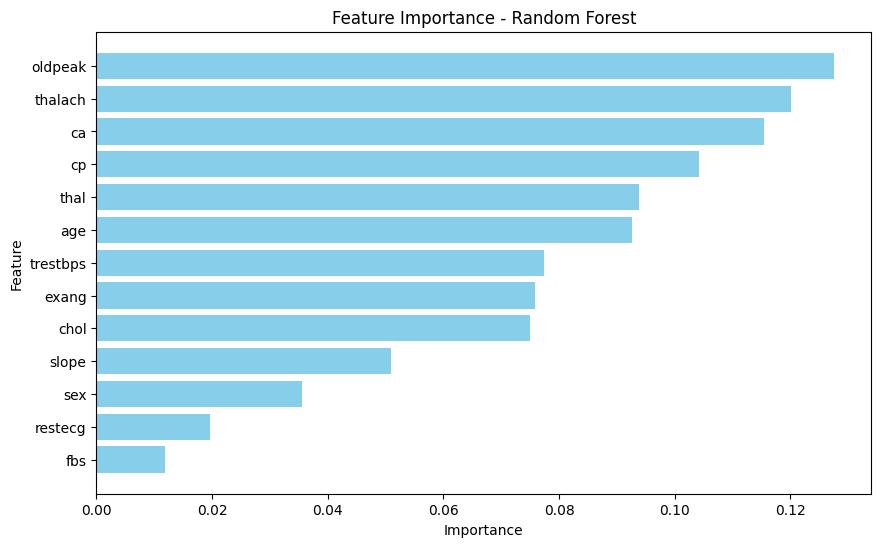

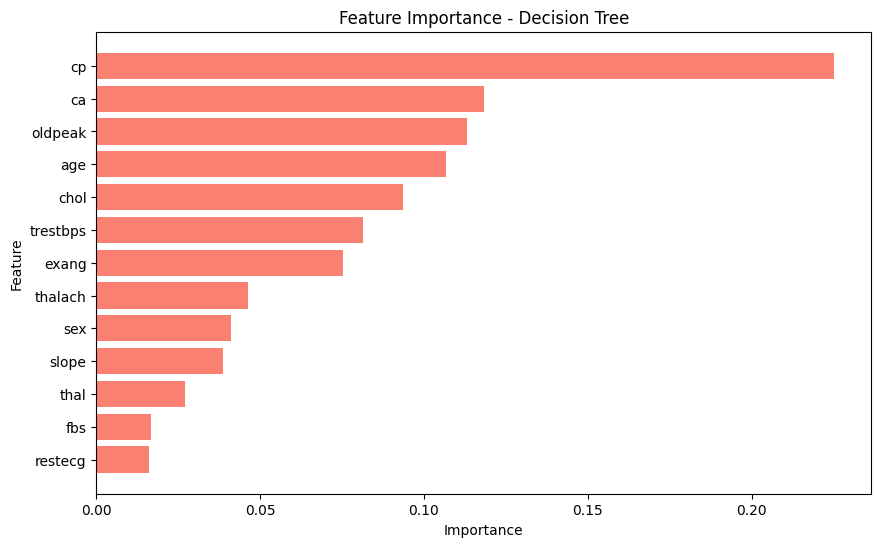

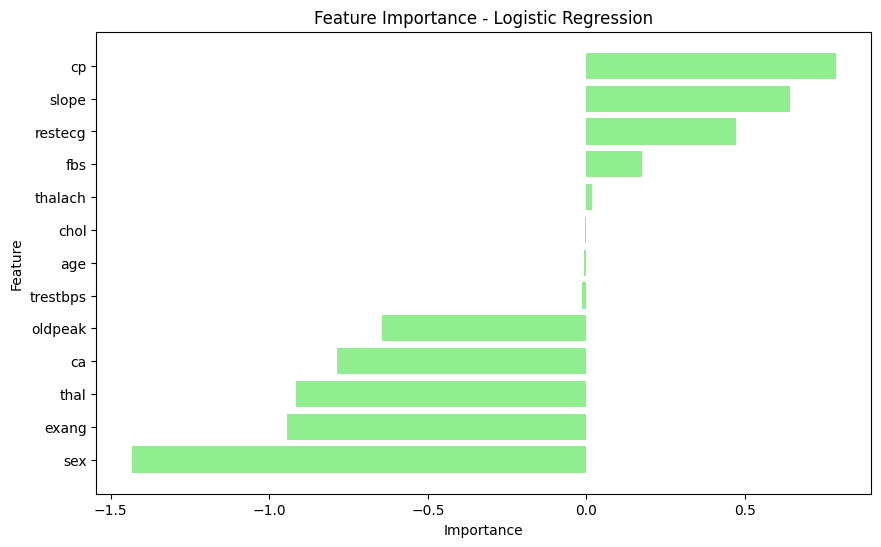

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Ensure X_train and y_train are defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Feature importance analysis for Random Forest
rf_feature_importances = rf_model.feature_importances_
rf_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

# Feature importance analysis for Decision Tree
dt_feature_importances = dt_model.feature_importances_
dt_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances for Decision Tree
plt.figure(figsize=(10, 6))
plt.barh(dt_importance_df['Feature'], dt_importance_df['Importance'], color='salmon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis
plt.show()

# Feature importance analysis for Logistic Regression (using coefficients)
lr_coefficients = lr_model.coef_[0]
lr_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lr_coefficients
}).sort_values(by='Importance', ascending=False)

# Plot feature importances for Logistic Regression
plt.figure(figsize=(10, 6))
plt.barh(lr_importance_df['Feature'], lr_importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis
plt.show()


In [38]:
#find the number of features the model was trained on

# Get the number of features used in the Random Forest model

# Get the number of features used in the Random Forest model

num_features_rf = rf_model.n_features_in_
print("Number of features used in Random Forest model:", num_features_rf)

# Get the number of features used in the Decision Tree model

num_features_dt = dt_model.n_features_in_
print("Number of features used in Decision Tree model:", num_features_dt)

# Get the number of features used in the Logistic Regression model

num_features_lr = lr_model.coef_.shape[1]

print("Number of features used in Logistic Regression model:", num_features_lr)




Number of features used in Random Forest model: 13
Number of features used in Decision Tree model: 13
Number of features used in Logistic Regression model: 13


In [39]:
# Number of features the model was trained on
num_features = X.shape[1]
print(f'The model was trained on {num_features} features.')

The model was trained on 13 features.


In [40]:
#print all the features that the model was trained on

# Get the feature names
feature_names = X.columns

# Print all the features that the model was trained on

print("Features used in the model:")

for i, feature in enumerate(feature_names):

    print(f"{i + 1}. {feature}")

# Save the feature importances to a CSV file

Features used in the model:
1. age
2. sex
3. cp
4. trestbps
5. chol
6. fbs
7. restecg
8. thalach
9. exang
10. oldpeak
11. slope
12. ca
13. thal


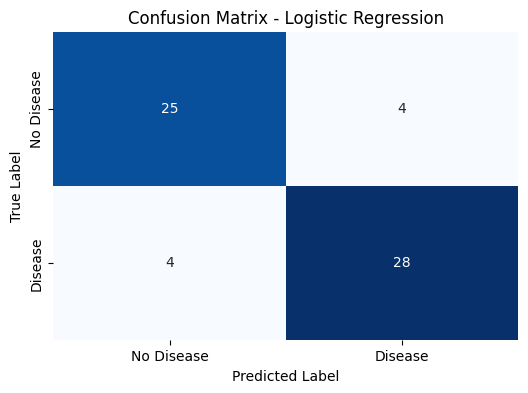

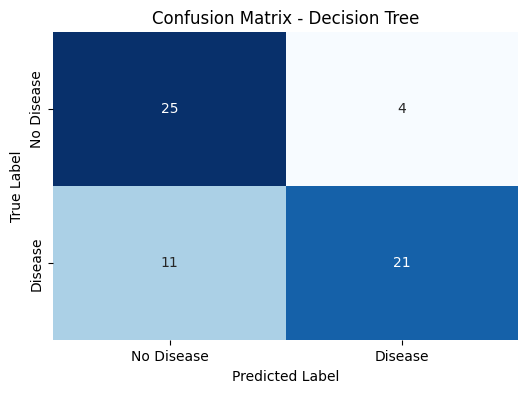

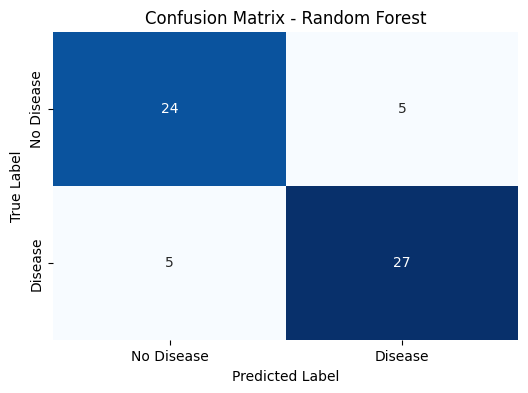

In [42]:
def plot_confusion_matrix(model_name, y_test, preds):
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False, 
                xticklabels=['No Disease', 'Disease'], 
                yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Confusion matrix for Logistic Regression
plot_confusion_matrix('Logistic Regression', y_test, y_pred_lr)

# Confusion matrix for Decision Tree
plot_confusion_matrix('Decision Tree', y_test, y_pred_dt)

# Confusion matrix for Random Forest
plot_confusion_matrix('Random Forest', y_test, y_pred_rf)

In [43]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_rf_scores = cross_val_score(rf_model, X, y, cv=10)
print(f'Random Forest 10-Fold CV Accuracy: {np.mean(cv_rf_scores):.4f} ± {np.std(cv_rf_scores):.4f}')

# Cross-validation for Decision Tree
cv_dt_scores = cross_val_score(dt_model, X, y, cv=10)
print(f'Decision Tree 10-Fold CV Accuracy: {np.mean(cv_dt_scores):.4f} ± {np.std(cv_dt_scores):.4f}')

# Cross-validation for Logistic Regression
cv_lr_scores = cross_val_score(lr_model, X, y, cv=10)
print(f'Logistic Regression 10-Fold CV Accuracy: {np.mean(cv_lr_scores):.4f} ± {np.std(cv_lr_scores):.4f}')

Random Forest 10-Fold CV Accuracy: 0.8317 ± 0.0502
Decision Tree 10-Fold CV Accuracy: 0.7783 ± 0.0630
Logistic Regression 10-Fold CV Accuracy: 0.8216 ± 0.0603


In [46]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_scores = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]
roc_aucs = [roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]), 
            roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1]), 
            roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])]

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'ROC-AUC': roc_aucs
})

print(summary_df)

                 Model  Accuracy   ROC-AUC
0  Logistic Regression  0.868852  0.924569
1        Decision Tree  0.754098  0.759159
2        Random Forest  0.836066  0.922414


In [47]:
#save the model

import joblib
import os

# Save the models to disk

model_dir = '/Users/daniyalrosli/fyp/models'

os.makedirs(model_dir, exist_ok=True)

joblib.dump(lr_model, os.path.join(model_dir, 'logistic_regression_model.pkl'))

joblib.dump(dt_model, os.path.join(model_dir, 'decision_tree_model.pkl'))

joblib.dump(rf_model, os.path.join(model_dir, 'random_forest_model.pkl'))

print("Models saved successfully.")

# Load the models from disk

loaded_lr_model = joblib.load(os.path.join(model_dir, 'logistic_regression_model.pkl'))

loaded_dt_model = joblib.load(os.path.join(model_dir, 'decision_tree_model.pkl'))

loaded_rf_model = joblib.load(os.path.join(model_dir, 'random_forest_model.pkl'))

# Make predictions using the loaded models



Models saved successfully.


In [48]:
#make predictions using the loaded models

# Make predictions using the loaded Logistic Regression model

y_pred_lr_loaded = loaded_lr_model.predict(X_test)

# Make predictions using the loaded Decision Tree model

y_pred_dt_loaded = loaded_dt_model.predict(X_test)

# Make predictions using the loaded Random Forest model

y_pred_rf_loaded = loaded_rf_model.predict(X_test)

# Display the predictions

print("Predictions using Logistic Regression (loaded model):", y_pred_lr_loaded)

print("Predictions using Decision Tree (loaded model):", y_pred_dt_loaded)

print("Predictions using Random Forest (loaded model):", y_pred_rf_loaded)

# Make predictions using the Random Forest model



Predictions using Logistic Regression (loaded model): [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]
Predictions using Decision Tree (loaded model): [0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predictions using Random Forest (loaded model): [0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]


In [49]:
#do the classification report

from sklearn.metrics import classification_report

# Classification report for Logistic Regression

lr_report = classification_report(y_test, y_pred_lr, target_names=['No Disease', 'Disease'])

print("Logistic Regression Classification Report:")

print(lr_report)

# Classification report for Decision Tree

dt_report = classification_report(y_test, y_pred_dt, target_names=['No Disease', 'Disease'])

print("Decision Tree Classification Report:")

print(dt_report)

# Classification report for Random Forest

rf_report = classification_report(y_test, y_pred_rf, target_names=['No Disease', 'Disease'])

print("Random Forest Classification Report:")

print(rf_report)



Logistic Regression Classification Report:
              precision    recall  f1-score   support

  No Disease       0.86      0.86      0.86        29
     Disease       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Decision Tree Classification Report:
              precision    recall  f1-score   support

  No Disease       0.69      0.86      0.77        29
     Disease       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61

Random Forest Classification Report:
              precision    recall  f1-score   support

  No Disease       0.83      0.83      0.83        29
     Disease       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro av

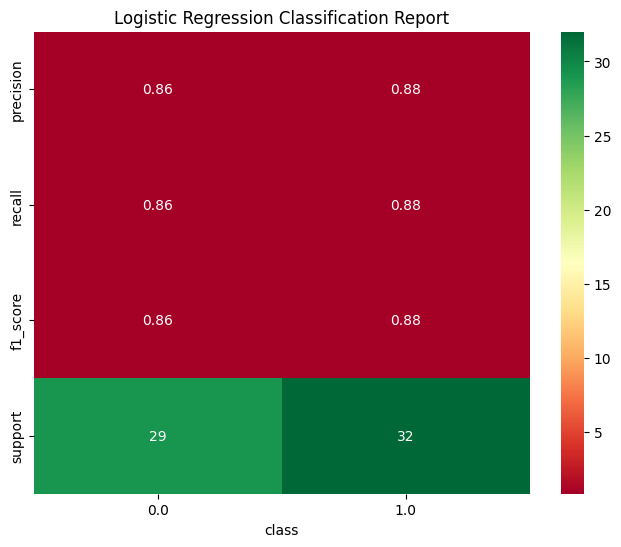

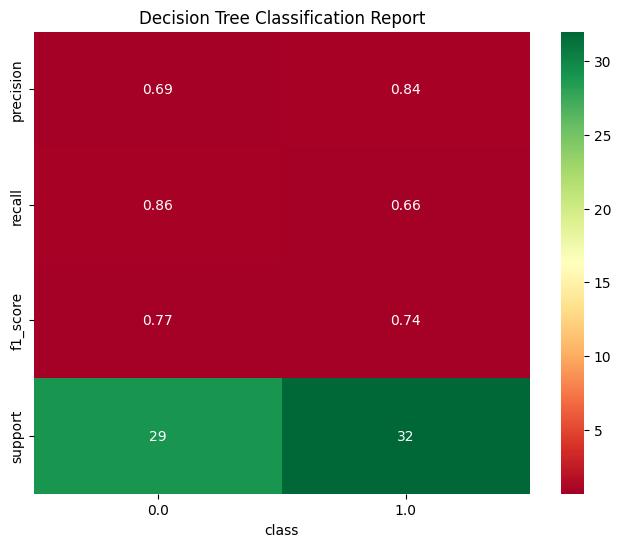

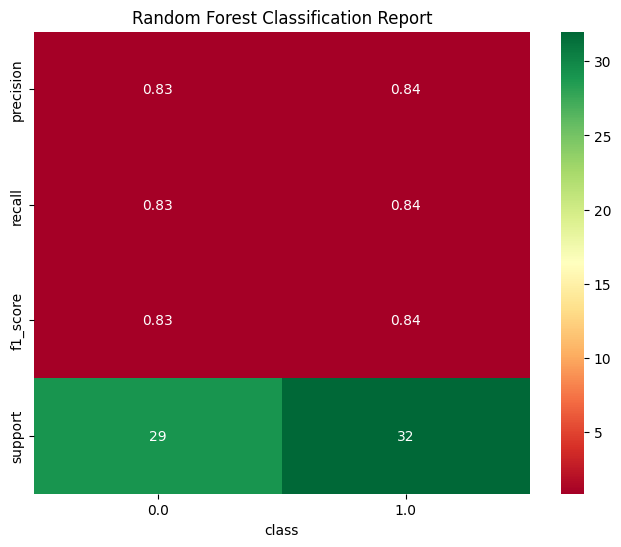

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Assuming you have your classification reports in the form of strings
# Example:
lr_report = classification_report(y_test, y_pred_lr)
dt_report = classification_report(y_test, y_pred_dt)
rf_report = classification_report(y_test, y_pred_rf)

# Function to plot classification report
def plot_classification_report(report, title='Classification Report', cmap='RdYlGn'):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:]:  # Skip the first two lines
        row = {}
        row_data = line.split()
        
        # Skip if the line doesn't contain valid data (e.g., accuracy, macro, weighted)
        if len(row_data) == 0 or row_data[0] in ['accuracy', 'macro', 'weighted']:
            continue
        
        # Extract class, precision, recall, f1_score, and support
        try:
            row['class'] = row_data[0]  # Class name
            row['precision'] = float(row_data[1])  # Precision
            row['recall'] = float(row_data[2])  # Recall
            row['f1_score'] = float(row_data[3])  # F1 score
            row['support'] = float(row_data[4])  # Support
            report_data.append(row)
        except ValueError:
            # If the row cannot be parsed due to non-numeric values, skip it
            continue
            
    df = pd.DataFrame.from_dict(report_data)
    df.set_index('class', inplace=True)
    df = df.T  # Transpose the dataframe so metrics are in rows
    plt.figure(figsize=(8, 6))
    sns.heatmap(df, annot=True, cmap=cmap)
    plt.title(title)
    plt.show()

# Plot classification report for Logistic Regression
plot_classification_report(lr_report, title='Logistic Regression Classification Report')

# Plot classification report for Decision Tree
plot_classification_report(dt_report, title='Decision Tree Classification Report')

# Plot classification report for Random Forest
plot_classification_report(rf_report, title='Random Forest Classification Report')